In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv(r"data\ObesityDataSet_cleaned_and_data_sinthetic.csv")

print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2111 non-null   object 
 1   Gender                          2111 non-null   object 
 2   Age                             2111 non-null   int64  
 3   Height                          2111 non-null   float64
 4   Weight                          2111 non-null   int64  
 5   family_history_with_overweight  2111 non-null   object 
 6   FAVC                            2111 non-null   object 
 7   FCVC                            2111 non-null   object 
 8   NCP                             2111 non-null   int64  
 9   CAEC                            2111 non-null   object 
 10  SMOKE                           2111 non-null   object 
 11  CH2O                            2111 non-null   object 
 12  SCC                             21

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2111 non-null   object 
 1   Gender                          2111 non-null   object 
 2   Age                             2111 non-null   int64  
 3   Height                          2111 non-null   float64
 4   Weight                          2111 non-null   float64
 5   family_history_with_overweight  2111 non-null   object 
 6   FAVC                            2111 non-null   object 
 7   FCVC                            2111 non-null   object 
 8   NCP                             2111 non-null   int64  
 9   CAEC                            2111 non-null   object 
 10  SMOKE                           2111 non-null   object 
 11  CH2O                            2111 non-null   object 
 12  SCC                             21

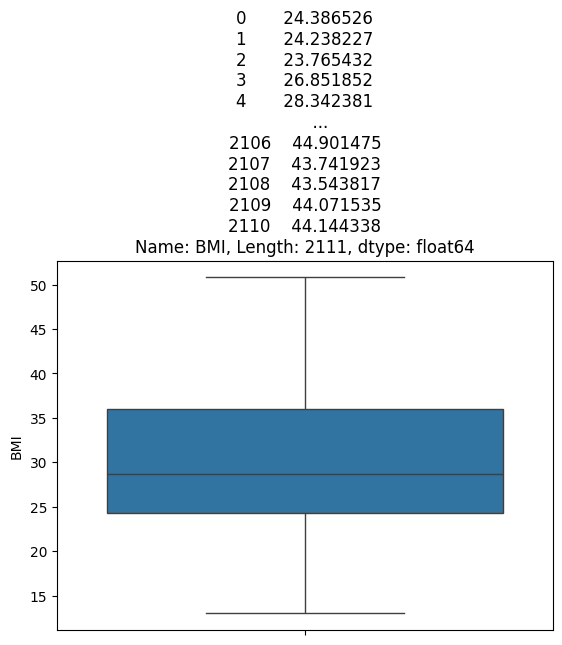

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(df.info())
print(df.describe())

missing_values = df.isnull().sum()
print(f"결측치:\n", missing_values)

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df[col] = df[col].clip(lower_bound, upper_bound)

    print(f"{col} 처리 완료: 하한 {lower_bound}, 상한 {upper_bound}")

sns.boxplot(df['BMI'])
plt.title(df['BMI'])
plt.show()

In [75]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")

Categorical columns: Index(['id', 'Gender', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'NObeyesdad'],
      dtype='object')
id: 2111 unique values
Gender: 2 unique values
family_history_with_overweight: 2 unique values
FAVC: 2 unique values
FCVC: 3 unique values
CAEC: 4 unique values
SMOKE: 2 unique values
CH2O: 3 unique values
SCC: 2 unique values
FAF: 4 unique values
TUE: 3 unique values
CALC: 4 unique values
MTRANS: 5 unique values
NObeyesdad: 7 unique values


In [ ]:
####

In [6]:
# FAF, TUE 데이터 내용 확인 (수치형이 아님)
print(df['FAF'].unique())
print(df['TUE'].unique())

df['FAF'] = df['FAF'].replace({'0': 0, '1 to 2': 1.5, '2 to 4': 3, '4 to 5': 4.5}).astype(float)
df['TUE'] = df['TUE'].replace({'0 to 2': 1, '3 to 5': 4, '>5': 6}).astype(float)

print(df['FAF'].unique())
print(df['TUE'].unique())

['0' '4 to 5' '2 to 4' '1 to 2']
['3 to 5' '0 to 2' '>5']
[0.  4.5 3.  1.5]
[4. 1. 6.]


C:\Users\USER\AppData\Local\Temp\ipykernel_16988\1063813728.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FAF'] = df['FAF'].replace({'0': 0, '1 to 2': 1.5, '2 to 4': 3, '4 to 5': 4.5}).astype(float)
C:\Users\USER\AppData\Local\Temp\ipykernel_16988\1063813728.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['TUE'] = df['TUE'].replace({'0 to 2': 1, '3 to 5': 4, '>5': 6}).astype(float)


In [ ]:
##### #####

In [7]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# 1. 라벨 인코딩
label_cols = ['Gender', 'family_history_with_overweight','FCVC', 'FAVC', 'CAEC', 'CH2O', 'CALC', 'MTRANS', 'SMOKE', 'SCC']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le # 추후 디코딩 용 저장

# 결과 확인
print(df[label_cols].head())

# 2. Min-Max 스케일링
scaler = MinMaxScaler()
scale_cols = ['Age', 'Height', 'Weight', 'BMI', 'FAF', 'TUE']
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# 결과 확인
print(df[scale_cols].describe())

   Gender  family_history_with_overweight  FCVC  FAVC  CAEC  CH2O  CALC  \
0       0                               1     2     0     3     0     2   
1       0                               1     0     0     3     2     3   
2       1                               1     2     0     3     0     1   
3       1                               0     0     0     3     0     1   
4       1                               0     2     0     3     0     3   

   MTRANS  SMOKE  SCC  
0       3      0    0  
1       3      1    1  
2       3      0    0  
3       4      0    0  
4       3      0    0  
               Age       Height       Weight          BMI          FAF  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.219489     0.474863     0.355140     0.441685     0.335544   
std       0.135257     0.176047     0.195437     0.211867     0.298487   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.127660     0.339623    

In [ ]:
##### #####
##### #####

In [ ]:
# 파생변수 생성
df['family_history_with_overweight'] = df['family_history_with_overweight'].astype(float)
df['ARI'] = (df['BMI'] * (1 + 0.5 * df['family_history_with_overweight'])) / (1 + df['FAF'])

# 결과 확인
print(df[['BMI', 'family_history_with_overweight', 'FAF', 'ARI']].head())

# ARI 분포 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['ARI'], kde=True, bins=20)
plt.title('Distribution of Activity Risk Index (ARI)')
plt.xlabel('ARI')
plt.ylabel('Frequency')
plt.show()

In [ ]:
##### #####

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# 데이터 준비
X = df.drop(['NObeyesdad', 'id'], axis=1) # 종속변수 
y = df['NObeyesdad'] # 종속변수

# 데이터 분석
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1.로지스틱 회귀
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# 2. 서포트 벡터 머신
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# 3. K-NearestNeighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# 결과 비교
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

print("\nSupport Vector Machine:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

print("\nK-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

In [ ]:
##### #####

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

# 기본 성능 계산
base_model = voting_clf  # Soft Voting 모델 사용
base_model.fit(X_train, y_train)
base_pred = base_model.predict(X_test)
base_recall = recall_score(y_test, base_pred, average='macro')
print(f"Base Recall: {base_recall:.4f}")

# Drop Column Importance 계산
importance_results = {}

for col in X_train.columns:
    # 특정 변수를 제거한 데이터 생성
    X_train_drop = X_train.drop(columns=[col])
    X_test_drop = X_test.drop(columns=[col])

    # 모델 학습 및 평가
    base_model.fit(X_train_drop, y_train)
    drop_pred = base_model.predict(X_test_drop)
    drop_recall = recall_score(y_test, drop_pred, average='macro')

    # 중요도 저장
    importance_results[col] = base_recall - drop_recall  # 올바르게 Recall 차이 계산

# 결과 정렬 및 데이터프레임 생성
importance_df = pd.DataFrame(list(importance_results.items()), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Change in Recall')
plt.ylabel('Feature')
plt.title('Feature Importance (Drop Column Importance)')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
##### #####